<a href="https://colab.research.google.com/github/fromakim/osam_lecture/blob/main/OSAM_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OSAM Lecture Practice

## a. Background Settings

In [2]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


## b. Linear Regression

### b-1. Import Dataset

In [ ]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

### b-2. Dataset Building

In [ ]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names = column_names, na_values = '?', 
                          comment = '\t', sep = ' ', skipinitialspace = True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.shape

(392, 8)

In [ ]:
dataset.pop('Origin')

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [ ]:
train_dataset = dataset.sample(frac = 0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
print(train_dataset.shape)
print(test_dataset.shape)

(314, 7)
(78, 7)


In [ ]:
train_stats = train_dataset.describe()
train_stats.pop('MPG')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


In [ ]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

### b-3. Data Normalization

In [ ]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [ ]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
normed_train_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971


### b-4. Build Model

In [ ]:
train_dataset.shape

(314, 6)

In [ ]:
inputs = keras.Input(shape=(train_dataset.shape[1],))
inputs

<KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'input_1')>

In [ ]:
h = layers.Dense(64)(inputs)
h

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense')>

In [ ]:
outputs = layers.Dense(1)(h)
outputs

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>

In [ ]:
model = keras.Model(inputs = inputs, outputs = outputs)

### b-5. Show Model Structure

model.summary -> show brief model info

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


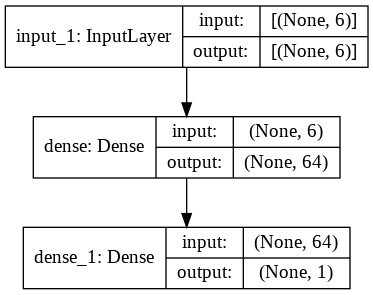

In [ ]:
keras.utils.plot_model(model, 'model.png', show_shapes=True)

### b-6. Set Loss Function & Optimizer Function

model.compile -> set loss func and optimizer

In [ ]:
model.compile(loss = 'mse', optimizer = tf.keras.optimizers.RMSprop(0.001))

### b-7. Verify Calculation

model.predict -> calculate y based on x and parameters

In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-5.1896647e-02],
       [-2.7654162e-01],
       [ 5.4604781e-01],
       [-5.8816653e-01],
       [-4.3282133e-01],
       [-1.4209747e-04],
       [-4.3722975e-01],
       [-1.7755163e-01],
       [ 2.1961081e-01],
       [ 4.3353513e-02]], dtype=float32)

### b-8. Run Model

model.fit -> Run Learning Process.

In [ ]:
epochs = 100

history = model.fit(
    normed_train_data,
    train_labels,
    epochs = epochs,
    validation_split = 0.2
)

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

history = model.fit(
    normed_train_data,
    train_labels,
    epochs = epochs,
    validation_split = 0.2
)

In [ ]:
loss = model.evaluate(normed_test_data, test_labels, verbose = 2)
print('Average MSE : {:5.2f} MPG'.format(loss))

3/3 - 0s - loss: 10.7629
Average MSE : 10.76 MPG


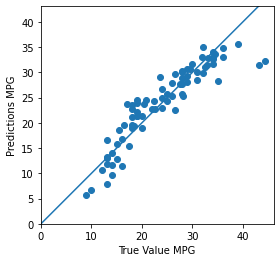

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Value MPG')
plt.ylabel('Predictions MPG')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## c. Linear Regression

### c-1. Import Dataset

In [ ]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 2us/step


'/root/.keras/datasets/auto-mpg.data'

### c-2. Dataset Building

In [ ]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names = column_names, na_values = '?', 
                          comment = '\t', sep = ' ', skipinitialspace = True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.shape

(392, 8)

In [ ]:
dataset.pop('Origin')

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [ ]:
train_dataset = dataset.sample(frac = 0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
print(train_dataset.shape)
print(test_dataset.shape)

(314, 7)
(78, 7)


In [ ]:
train_stats = train_dataset.describe()
train_stats.pop('MPG')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


In [ ]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

### c-3. Data Normalization

In [ ]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [ ]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
normed_train_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971


### c-4. Build Model

In [ ]:
train_dataset.shape

(314, 6)

In [ ]:
inputs = keras.Input(shape=(train_dataset.shape[1],))
inputs

<KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'input_1')>

In [ ]:
h = layers.Dense(64, activation='relu')(inputs)
h = layers.Dense(32)(h)
h

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_8')>

In [ ]:
outputs = layers.Dense(1)(h)
outputs

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_9')>

In [ ]:
model = keras.Model(inputs = inputs, outputs = outputs)

### c-5. Show Model Structure

model.summary -> show brief model info

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


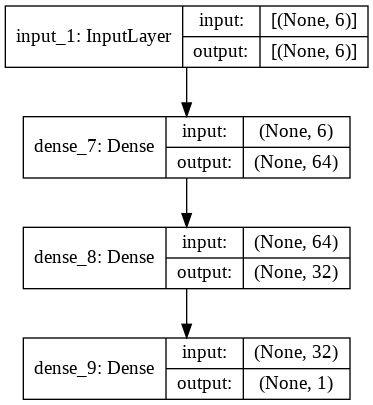

In [ ]:
keras.utils.plot_model(model, 'model.png', show_shapes=True)

### c-6. Set Loss Function & Optimizer Function

model.compile -> set loss func and optimizer

In [ ]:
model.compile(loss = 'mse', optimizer = tf.keras.optimizers.RMSprop(0.001))

### c-7. Verify Calculation

model.predict -> calculate y based on x and parameters

In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.12803721],
       [-0.30556986],
       [ 1.0647604 ],
       [-0.763842  ],
       [-0.68744737],
       [-0.2217588 ],
       [-0.80775833],
       [-0.66005087],
       [-0.08587733],
       [-0.25764796]], dtype=float32)

### c-8. Run Model

model.fit -> Run Learning Process.

In [ ]:
epochs = 100

history = model.fit(
    normed_train_data,
    train_labels,
    epochs = epochs,
    validation_split = 0.2
)

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

history = model.fit(
    normed_train_data,
    train_labels,
    epochs = epochs,
    validation_split = 0.2
)

In [ ]:
loss = model.evaluate(normed_test_data, test_labels, verbose = 2)
print('Average MSE : {:5.2f} MPG'.format(loss))

3/3 - 0s - loss: 6.6569
Average MSE :  6.66 MPG


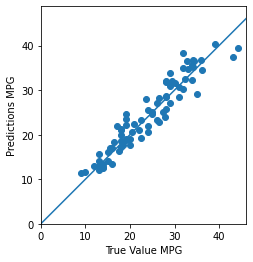

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Value MPG')
plt.ylabel('Predictions MPG')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
maxsize = 0
numRow = len(board)
numCol = len(board[0])
areaX = [-1, -1]
areaY = [-1, -1]

for y in range(numRow):
    for x in range(numCol):
        if board[y][x] == 1:
            offset = 0
            
            while True:
                if x in range(*areaX) or y in range(*areaY):
                    break
                
                offset += 1
                
                newY = y + offset
                newX = x + offset
                
                print(f'Offset: ({y}, {x}) to ({newY}, {newX})')
                
                if newY >= numRow or newX >= numCol:
                    print('Out of boundary')
                    break
                    
                newRow = board[newY][x:newX + 1]    # newRow = 
                newCol = [sublist[newX] for sublist in board[y:newY + 1]]
                
                print('new row:', newRow)
                print('new col:', newCol)
                
                if 0 in newRow or 0 in newCol:
                    break
            
            print(f'current size: {offset}')
            
            if offset ** 2 > maxsize:
                maxsize = offset ** 2
                
                areaX[0] = x
                areaX[1] = newX
                areaY[0] = y
                areaY[1] = newY

            print(areaX, areaY)

Offset: (0, 1) to (1, 2)
new row: [1, 1]
new col: [1, 1]
Offset: (0, 1) to (2, 3)
new row: [1, 1, 1]
new col: [1, 1, 1]
Offset: (0, 1) to (3, 4)
Out of boundary
current size: 3
[1, 4] [0, 3]
current size: 0
[1, 4] [0, 3]
current size: 0
[1, 4] [0, 3]
current size: 0
[1, 4] [0, 3]
current size: 0
[1, 4] [0, 3]
current size: 0
[1, 4] [0, 3]
current size: 0
[1, 4] [0, 3]
current size: 0
[1, 4] [0, 3]
current size: 0
[1, 4] [0, 3]
current size: 0
[1, 4] [0, 3]
current size: 0
[1, 4] [0, 3]
current size: 0
[1, 4] [0, 3]


In [ ]:
list(range(*areaX))

[1, 2, 3]

## d. Linear Classification

### d-1. Import Dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
test_images.shape

(10000, 28, 28)

### d-2. Data Preprocessing

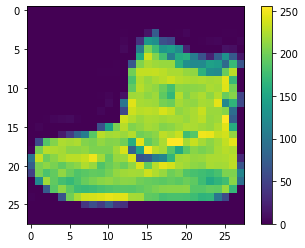

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

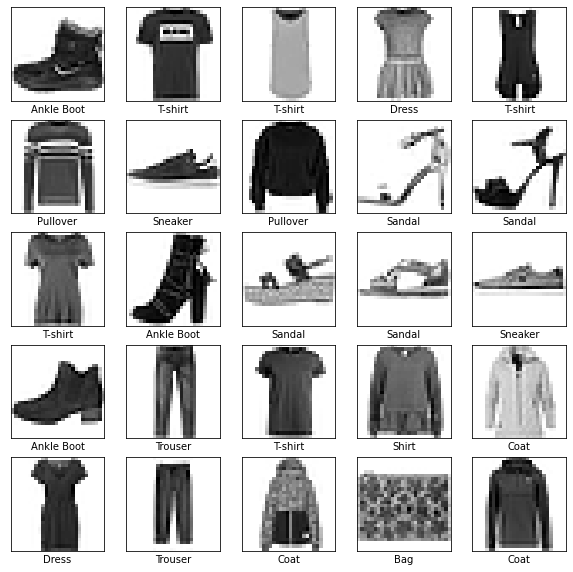

In [15]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### d-3. Build Model

In [16]:
inputs = keras.Input(shape=(28, 28))
h = layers.Flatten()(inputs)
h = layers.Dense(128)(h)
outputs = layers.Dense(10)(h)
outputs = layers.Activation('softmax')(outputs)

In [17]:
model = keras.Model(inputs = inputs, outputs = outputs)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### d-4. Set Loss Function & Optimizer Function

In [18]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### d-5. Train Model

In [19]:
model.fit(train_images, train_labels, epochs = 5, validation_split = 0.1)

Epoch 1/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8085 - val_loss: 0.5191 - val_accuracy: 0.8193
Epoch 2/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4615 - accuracy: 0.8395 - val_loss: 0.4357 - val_accuracy: 0.8497
Epoch 3/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4412 - accuracy: 0.8462 - val_loss: 0.4499 - val_accuracy: 0.8427
Epoch 4/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4320 - accuracy: 0.8495 - val_loss: 0.4558 - val_accuracy: 0.8387
Epoch 5/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4241 - accuracy: 0.8526 - val_loss: 0.4496 - val_accuracy: 0.8478


### d-6. Evaluate

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 0s - loss: 0.4973 - accuracy: 0.8317


### d-7. Make Prediction

In [21]:
predictions = model.predict(test_images)

In [22]:
predictions[0]

array([1.2730045e-07, 2.6204525e-08, 3.0167207e-06, 1.6343089e-06,
       5.0817748e-06, 7.5387545e-02, 2.9953376e-06, 6.0545873e-02,
       1.6028738e-03, 8.6245090e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

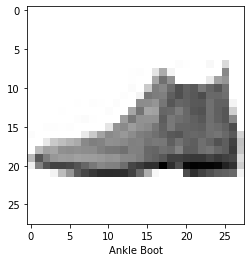

In [24]:
plt.imshow(test_images[0], cmap = plt.cm.binary)
plt.xlabel(class_names[np.argmax(predictions[0])])
plt.show()

## e. Linear Classification

### e-1. Import Dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

### e-2. Data Preprocessing

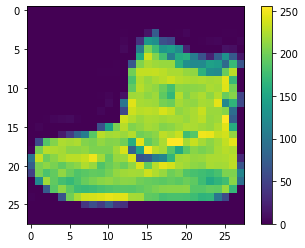

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

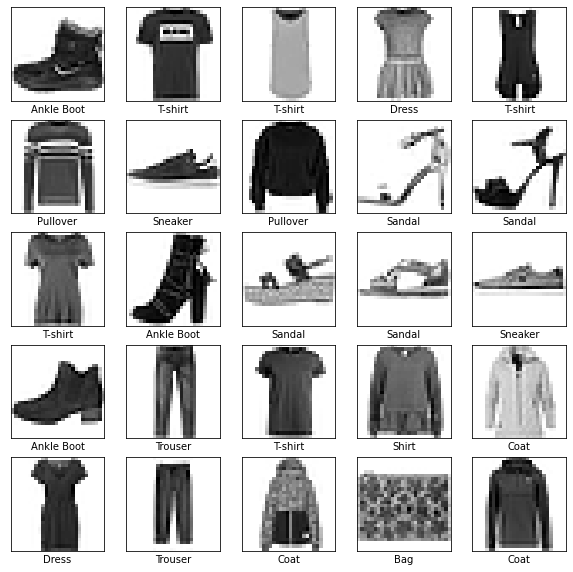

In [ ]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### e-3. Build Model

In [25]:
inputs = keras.Input(shape=(28, 28))
h = layers.Flatten()(inputs)
h = layers.Dense(128)(h)

h = layers.Activation('relu')(h)

outputs = layers.Dense(10)(h)
outputs = layers.Activation('softmax')(outputs)

In [26]:
model = keras.Model(inputs = inputs, outputs = outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_____________________________________________________

### e-4. Set Loss Function & Optimizer Function

In [27]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### e-5. Train Model

In [41]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

In [42]:
model.fit(train_images, train_labels, epochs = 100, validation_split = 0.1, callbacks = [early_stop])

Epoch 1/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1680 - accuracy: 0.9361 - val_loss: 0.3360 - val_accuracy: 0.8918
Epoch 2/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1606 - accuracy: 0.9393 - val_loss: 0.3649 - val_accuracy: 0.8880
Epoch 3/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1604 - accuracy: 0.9396 - val_loss: 0.3463 - val_accuracy: 0.8920
Epoch 4/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1532 - accuracy: 0.9420 - val_loss: 0.3614 - val_accuracy: 0.8935


### e-6. Evaluate

In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 0s - loss: 0.3696 - accuracy: 0.8897


### e-7. Make Prediction

In [44]:
predictions = model.predict(test_images)

In [45]:
predictions[0]

array([6.8824924e-10, 8.2748038e-18, 3.7389480e-11, 3.3400997e-13,
       3.4131263e-12, 9.3298223e-07, 1.3841987e-11, 5.5914617e-05,
       8.6825480e-10, 9.9994314e-01], dtype=float32)

In [46]:
np.argmax(predictions[0])

9

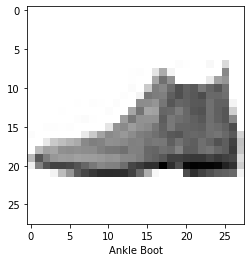

In [47]:
plt.imshow(test_images[0], cmap = plt.cm.binary)
plt.xlabel(class_names[np.argmax(predictions[0])])
plt.show()

In [58]:
!git push --set-upstream origin main

error: src refspec main does not match any.
error: failed to push some refs to 'https://github.com/osam_lecture'


In [52]:
!git config --global user.email fromakim@gmail.com
!git config --global user.name fromakim